In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("application_data.csv")
print(df.shape)
missing_threshold = 0.2
empty_cols = df.columns[df.isnull().sum() > missing_threshold * len(df)]
print(len(empty_cols))
df.drop(empty_cols, axis=1, inplace=True)
print(df.shape)
missing_percentage = df.isnull().sum() / len(df) * 100

(307511, 122)
50
(307511, 72)


In [54]:
median_value = df['AMT_ANNUITY'].median()
df['AMT_ANNUITY'].fillna(median_value, inplace=True)

print("Number of rows dropped:", len(empty_cols))

unwanted_columns = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
                    'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                    'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
                    'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
                    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                    'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
                    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df.drop(unwanted_columns, axis=1, inplace=True)

print(df.isnull().sum())

Number of rows dropped: 50
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                        0
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
LIVE_REGION_NOT_WORK_REGION        0
REG_CITY_NO

In [55]:
df.loc[df['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = 'F'
df = df.drop(df[df['ORGANIZATION_TYPE'] == 'XNA'].index)
numeric_columns = ['TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'REGION_POPULATION_RELATIVE',
                   'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
                   'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
                   'LIVE_CITY_NOT_WORK_CITY']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)
bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000,
        350000, 375000, 400000, 425000, 450000, 475000, 500000, 10000000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000', '150000-175000',
        '175000-200000', '200000-225000', '225000-250000', '250000-275000', '275000-300000', '300000-325000',
        '325000-350000', '350000-375000', '375000-400000', '400000-425000', '425000-450000', '450000-475000',
        '475000-500000', '500000 and above']

df['AMT_INCOME_RANGE'] = pd.cut(df['AMT_INCOME_TOTAL'], bins, labels=slot)


bins = [0, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 650000, 700000, 750000,
        800000, 850000, 900000, 1000000000]
slots = ['0-150000', '150000-200000', '200000-250000', '250000-300000', '300000-350000', '350000-400000',
         '400000-450000', '450000-500000', '500000-550000', '550000-600000', '600000-650000', '650000-700000',
         '700000-750000', '750000-800000', '800000-850000', '850000-900000', '900000 and above']

df['AMT_CREDIT_RANGE'] = pd.cut(df['AMT_CREDIT'], bins=bins, labels=slots)

data1_df = df.loc[df["TARGET"] == 0]
target1_df = df.loc[df["TARGET"] == 1]
ratio = round(len(data1_df) / len(target1_df), 2)
def uniplot(df, col, title, hue=None):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7
    if hue is not None:
        width += 4 * len(df[hue].unique())
    fig.set_size_inches(width, 8)
    
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    order = df[col].value_counts().index
    ax = sns.countplot(data=df, x=col, order=order, hue=hue, palette='crest')
    
    plt.show()


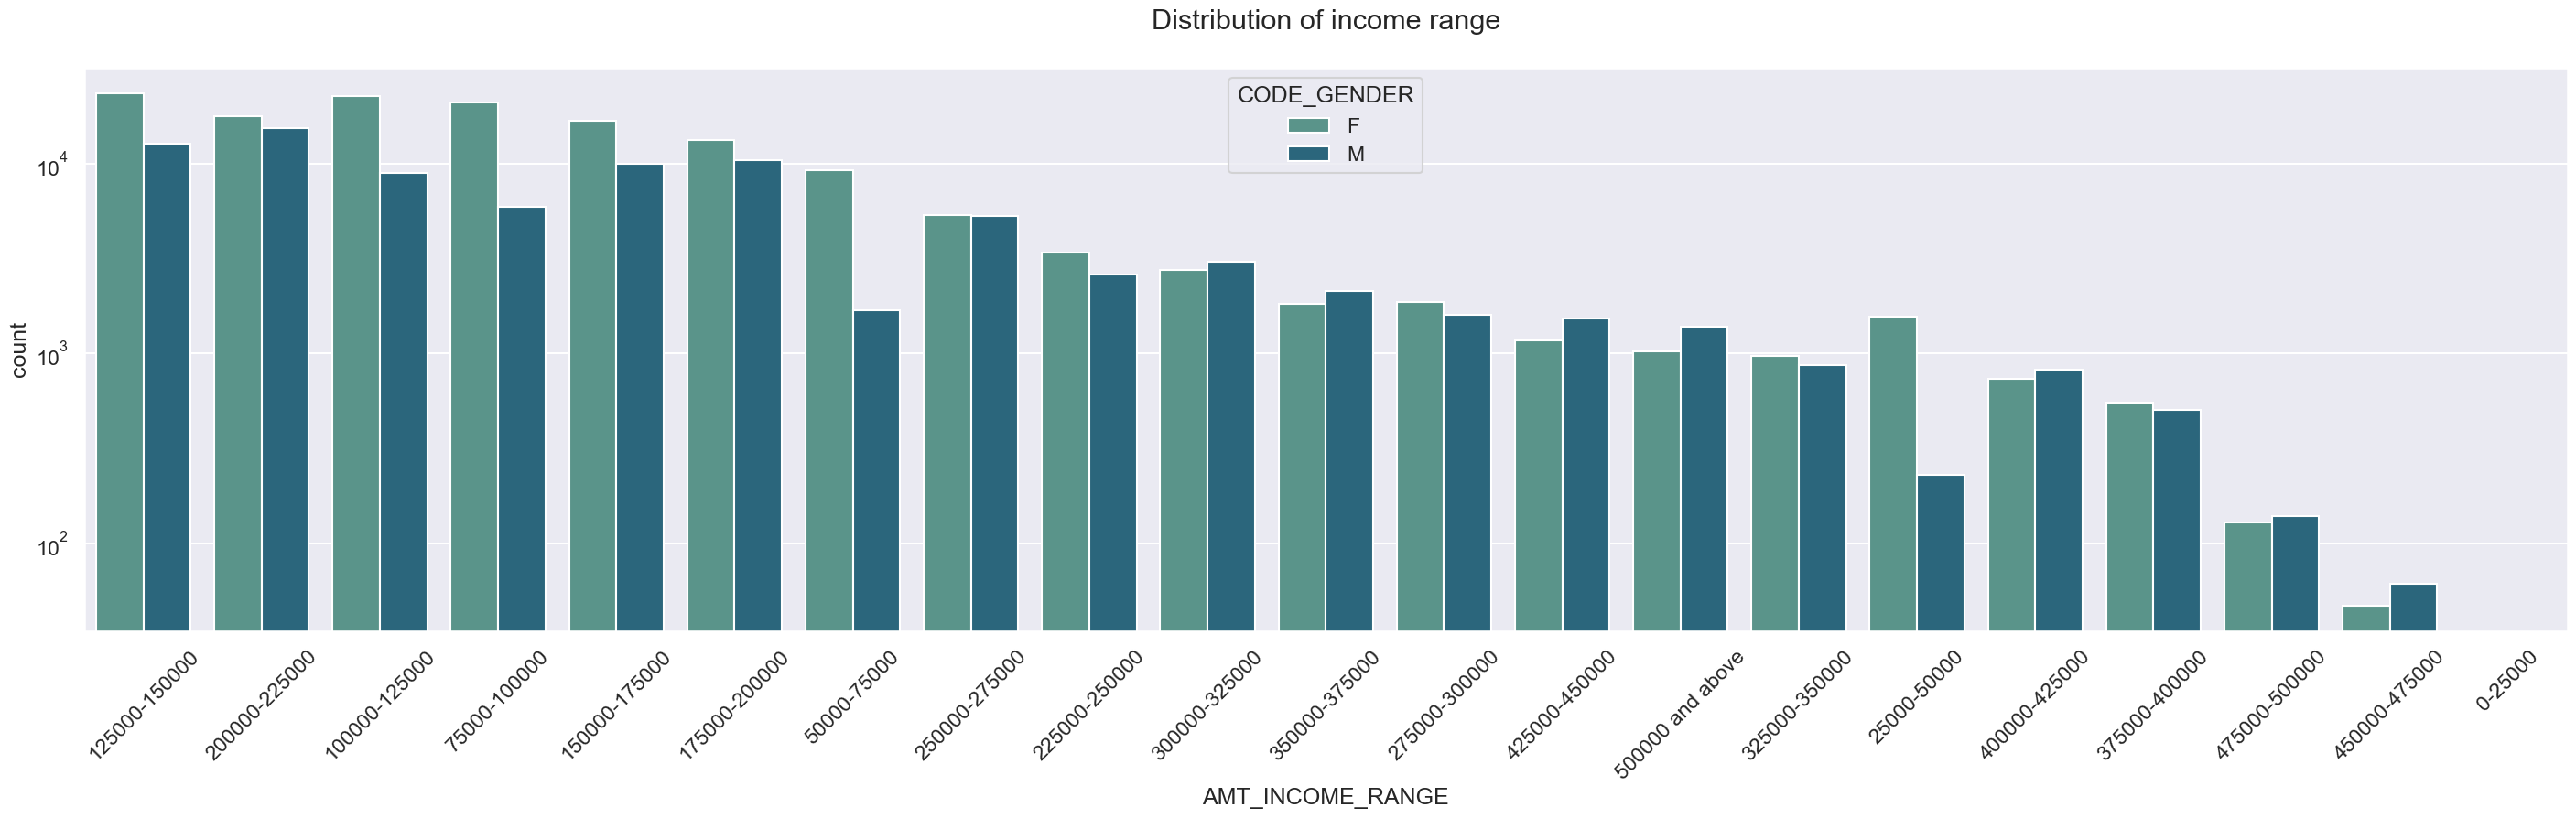

In [56]:
uniplot(data1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

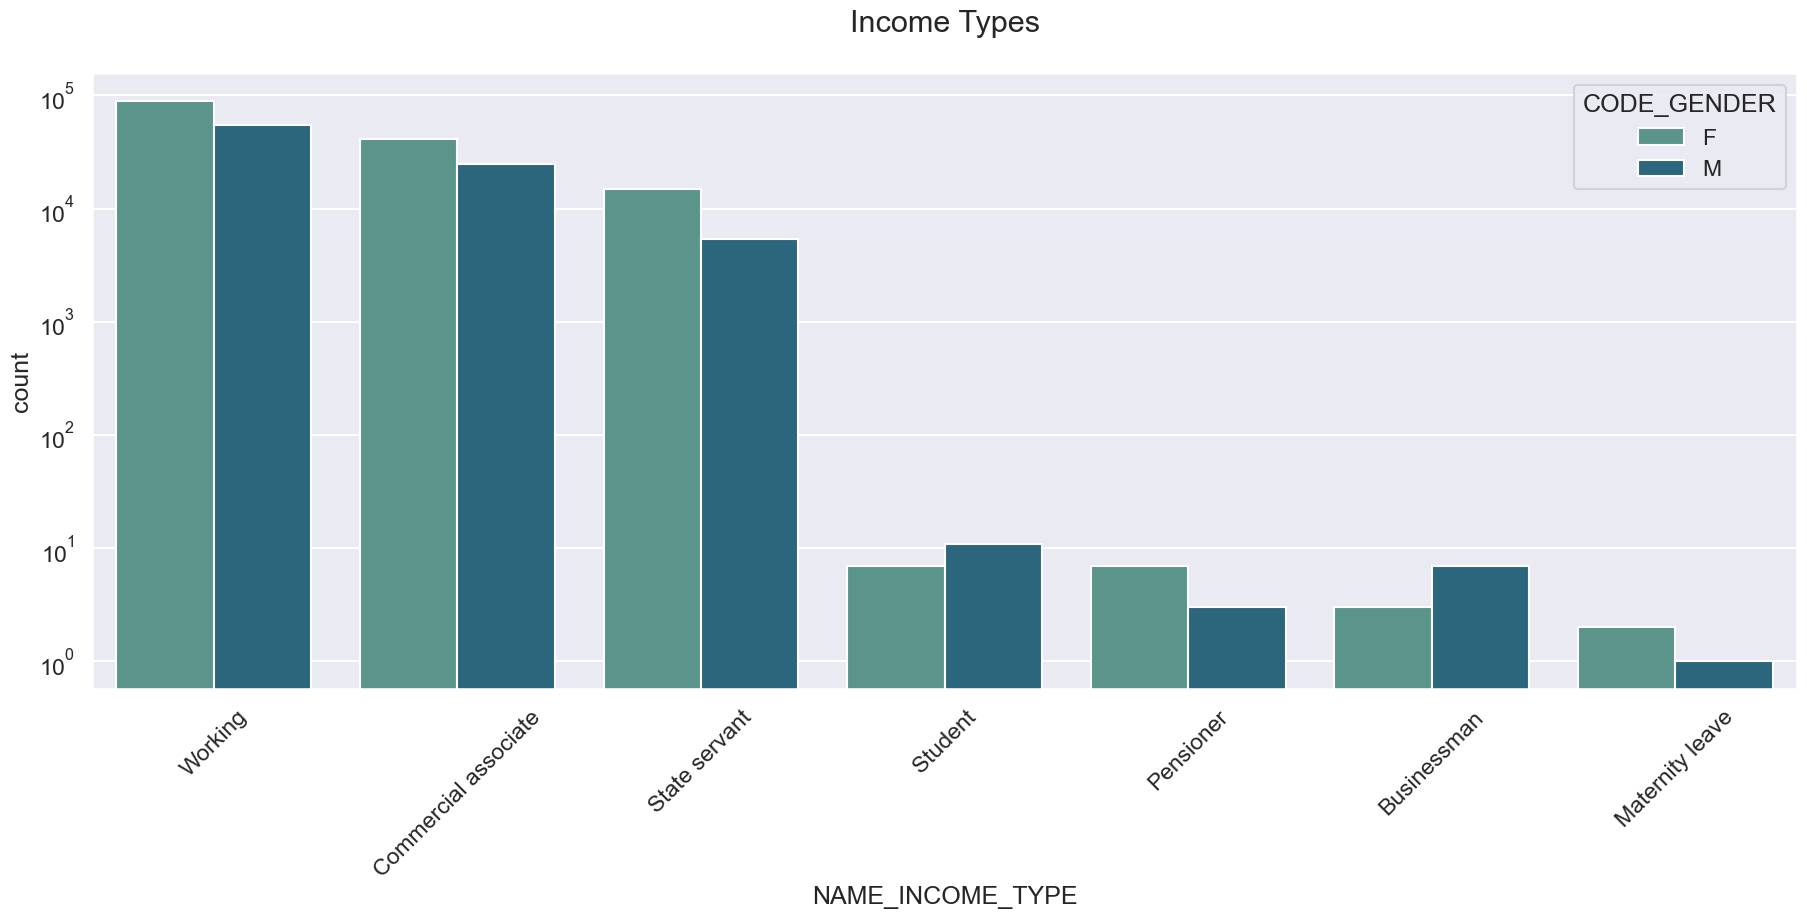

In [57]:
uniplot(data1_df,col='NAME_INCOME_TYPE',title='Income Types',hue='CODE_GENDER')

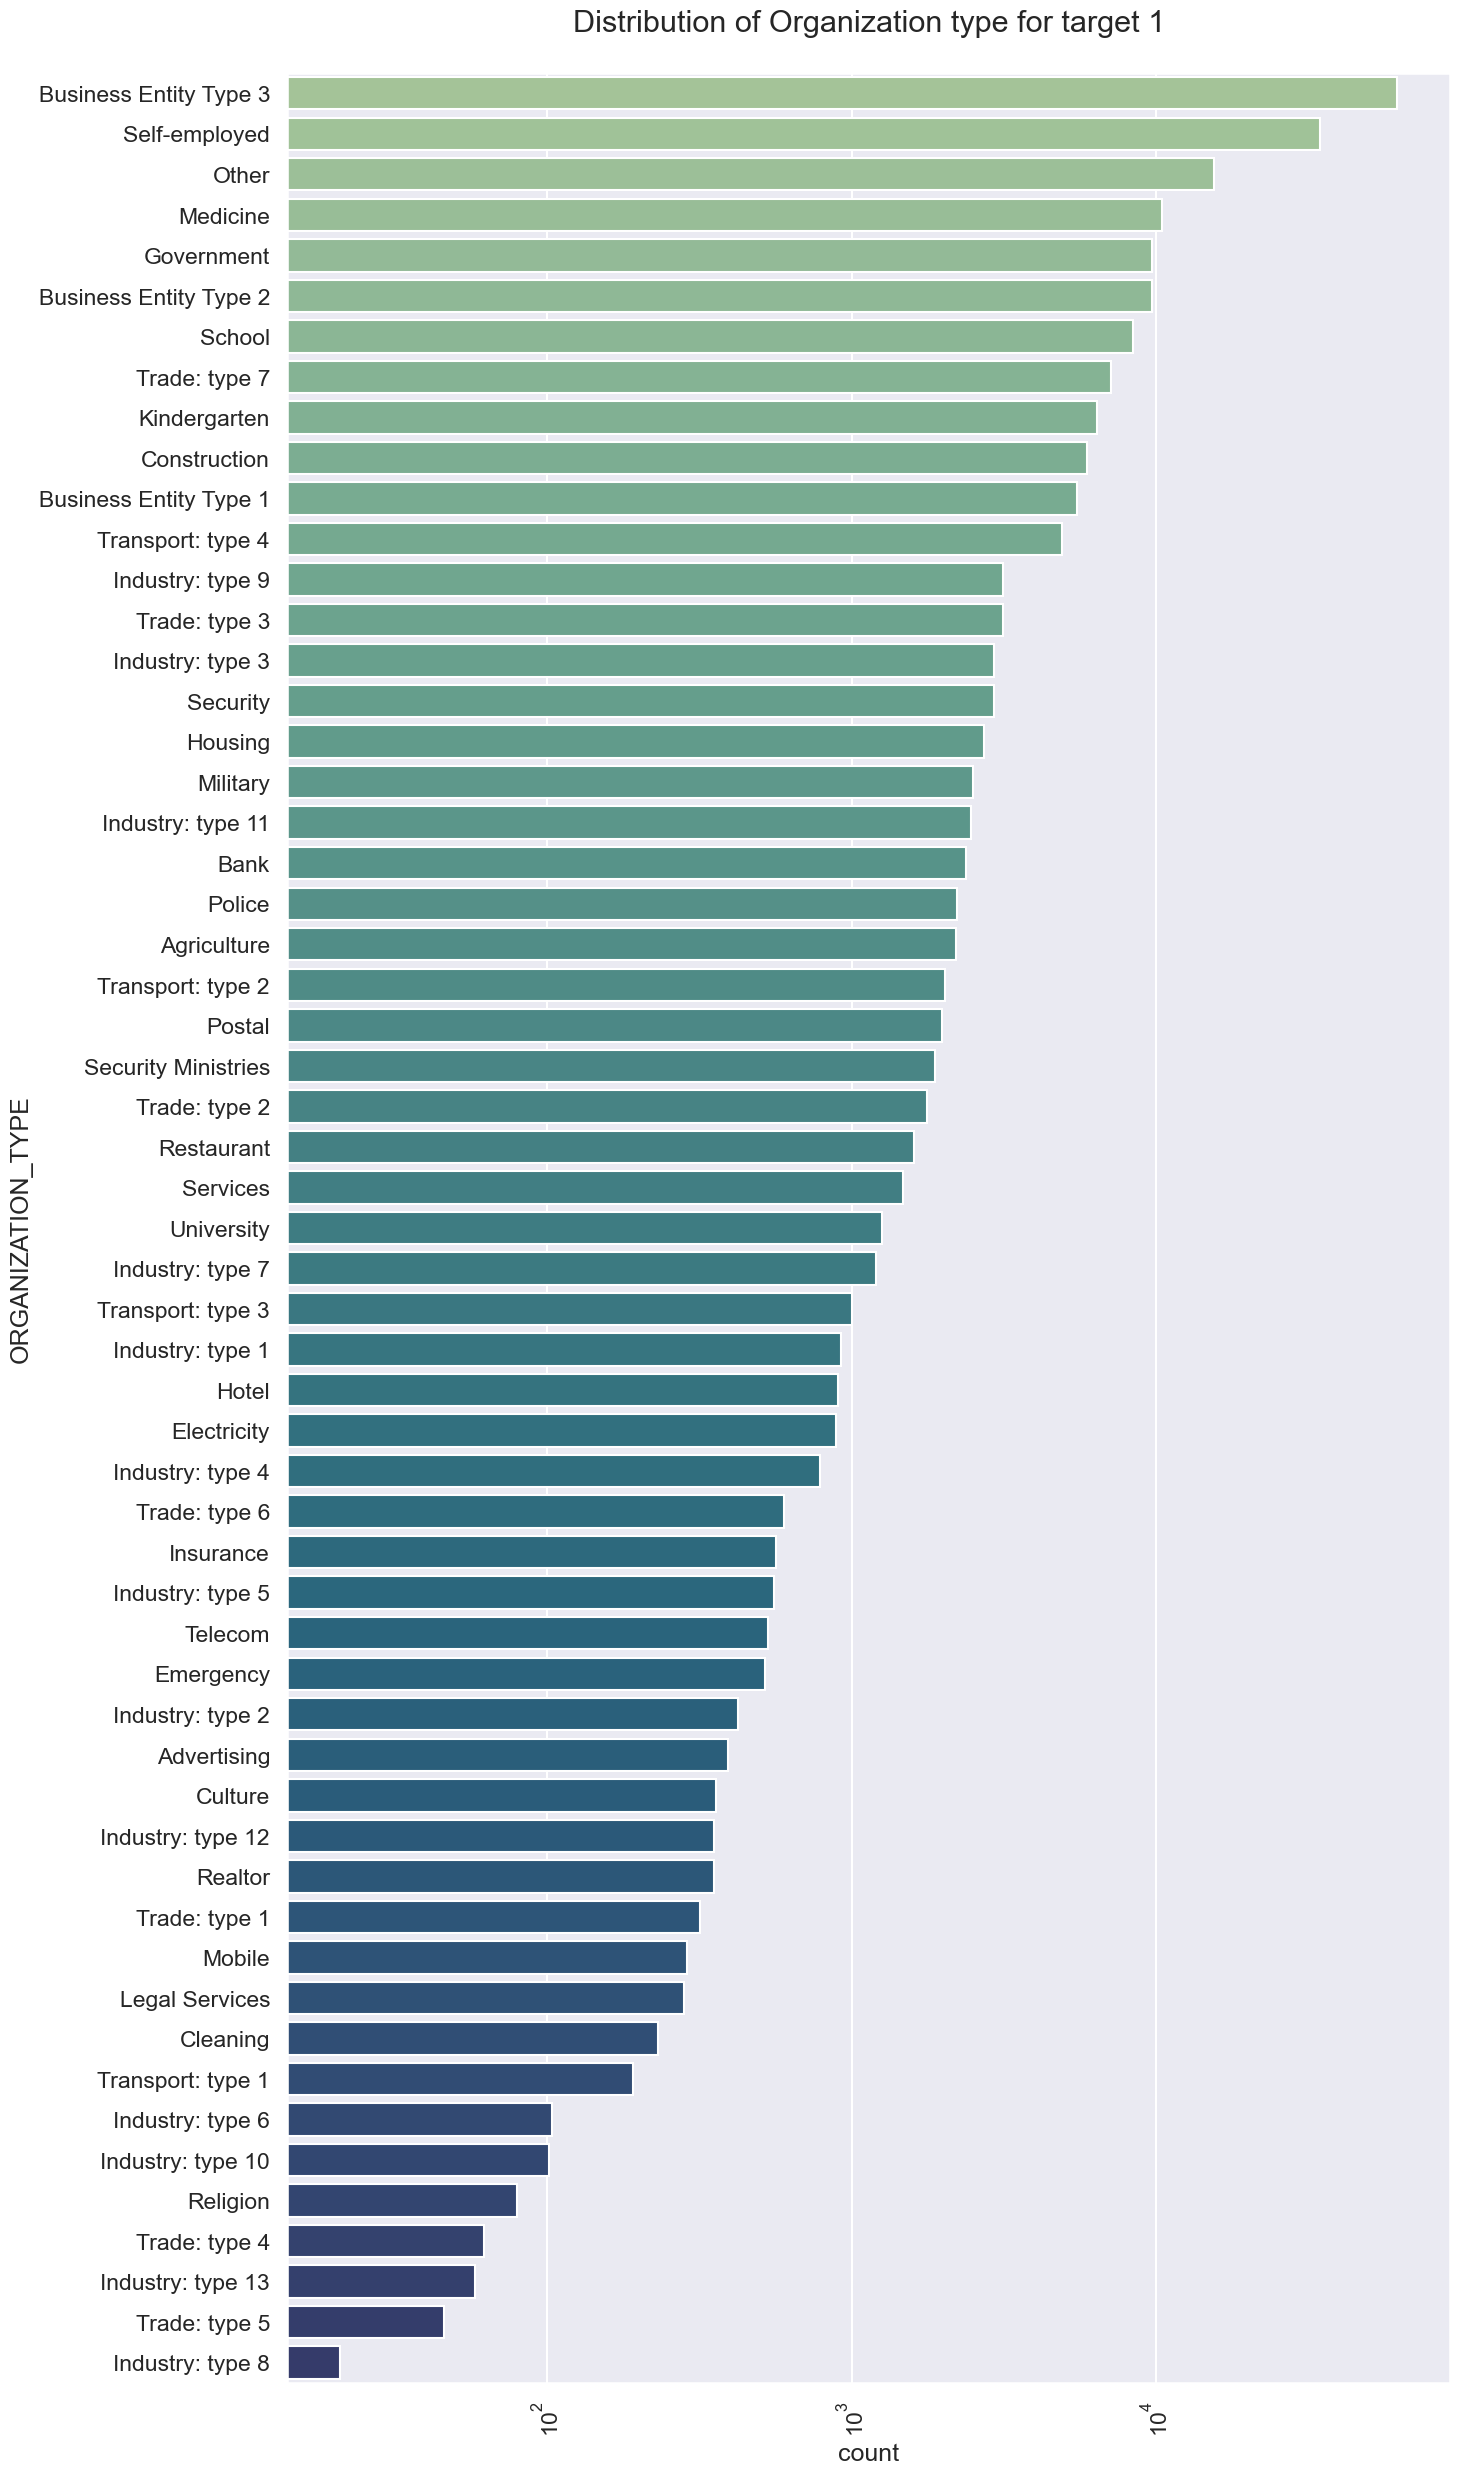

In [58]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.title("Distribution of Organization type for target 1")
plt.xticks(rotation=90)
plt.xscale('log')
sns.countplot(data=data1_df,y='ORGANIZATION_TYPE',order=data1_df['ORGANIZATION_TYPE'].value_counts().index,palette='crest')
plt.show()

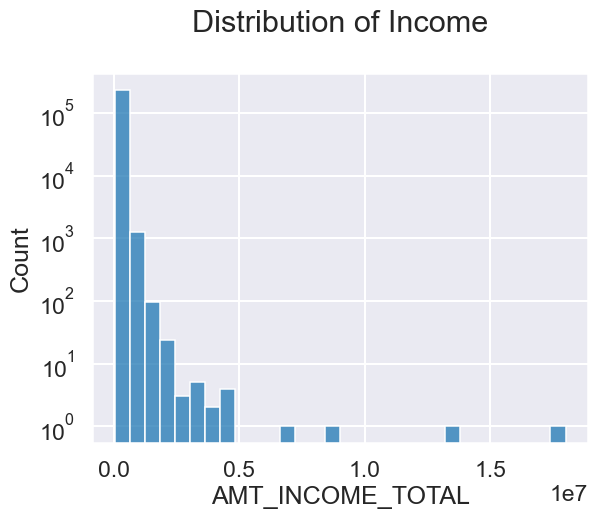

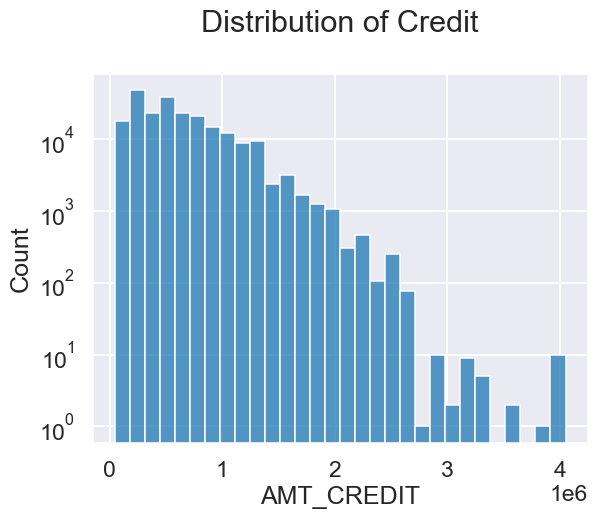

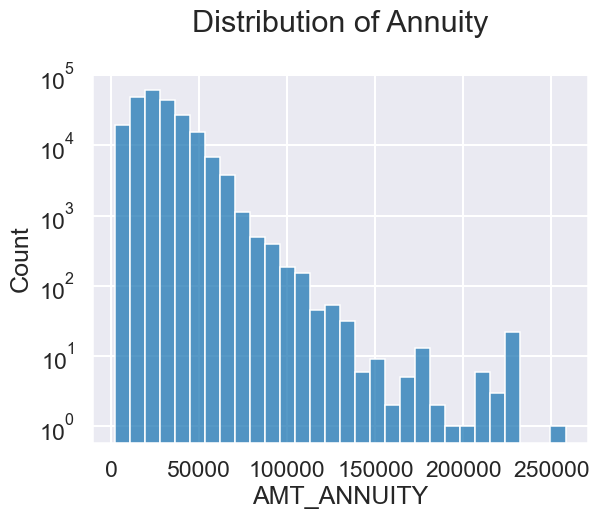

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
def univariate_numerical(data, col, title):
    sns.set_style('darkgrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    plt.title(title)
    plt.yscale('log')
    sns.histplot(data=data, x=col, bins=30)
    plt.show()

univariate_numerical(data=data1_df, col='AMT_INCOME_TOTAL', title='Distribution of Income')
univariate_numerical(data=data1_df,col='AMT_CREDIT',title='Distribution of Credit')
univariate_numerical(data=data1_df,col='AMT_ANNUITY',title='Distribution of Annuity')

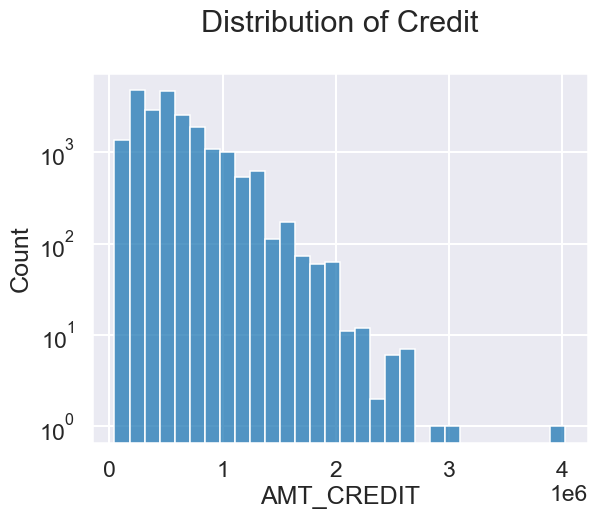

In [60]:
univariate_numerical(data=target1_df,col='AMT_CREDIT',title='Distribution of Credit')

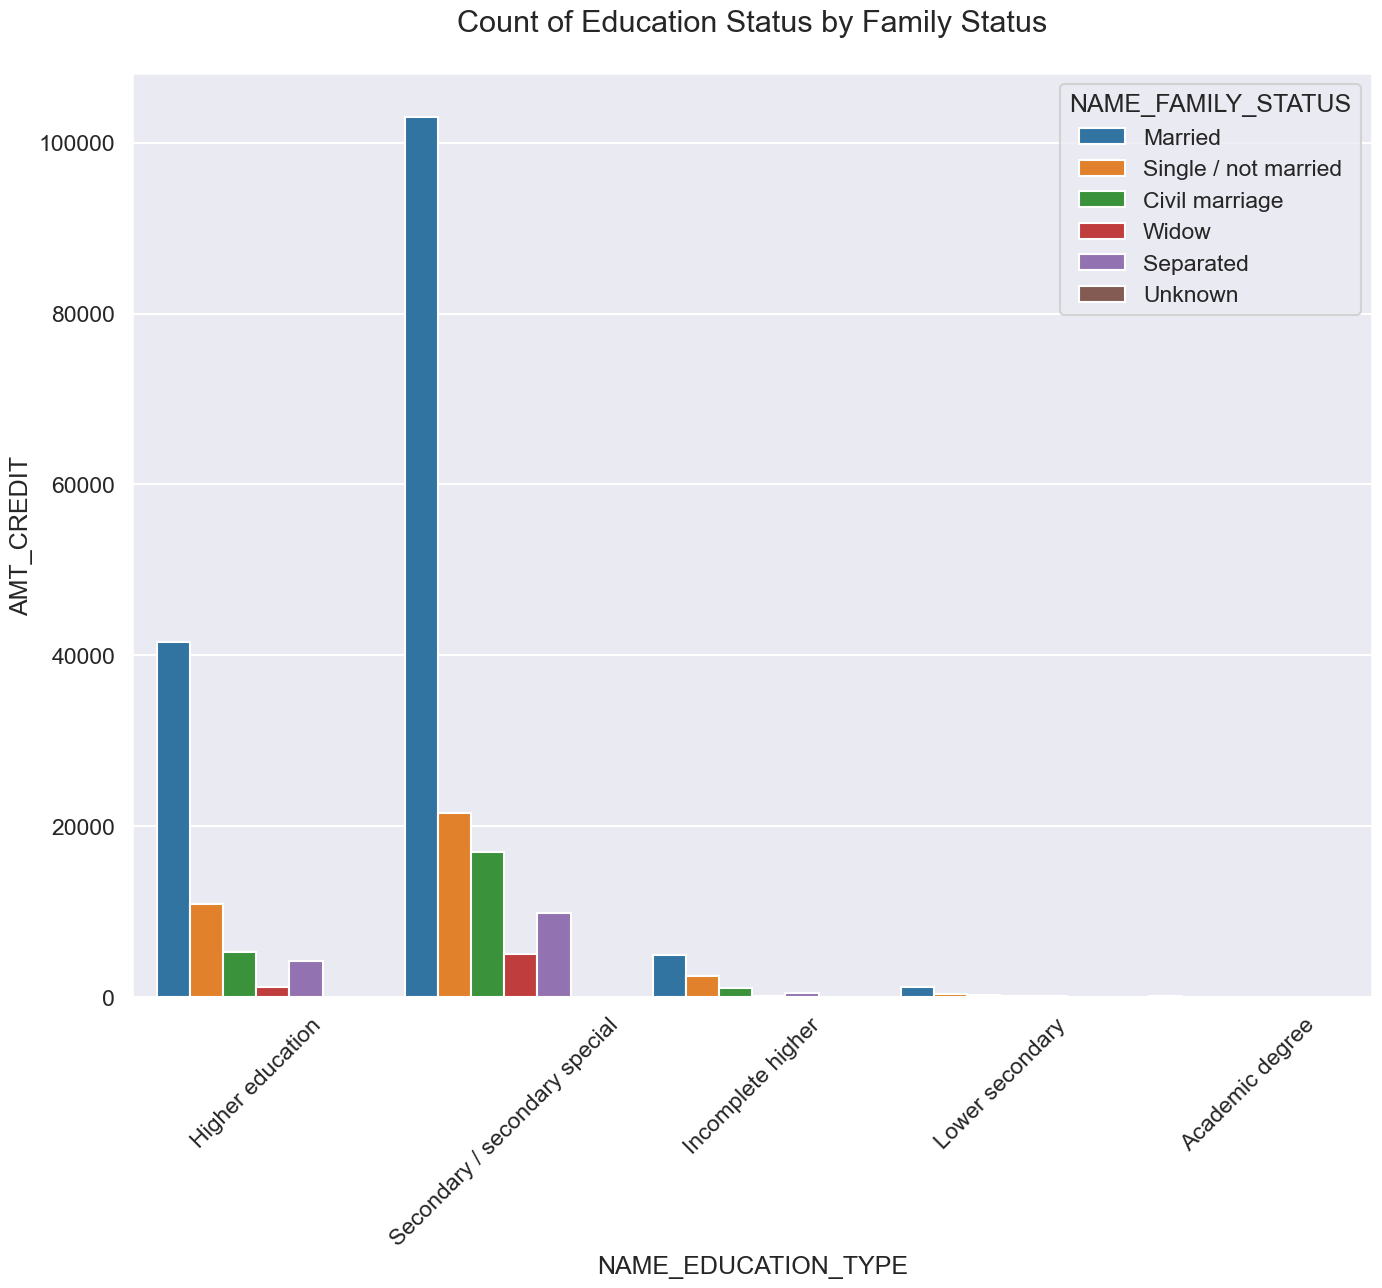

In [61]:
plt.figure(figsize=(16, 12))
plt.xticks(rotation=45)
sns.countplot(data=data1_df, x='NAME_EDUCATION_TYPE', hue='NAME_FAMILY_STATUS')
plt.title('Count of Education Status by Family Status')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('AMT_CREDIT')
plt.show()

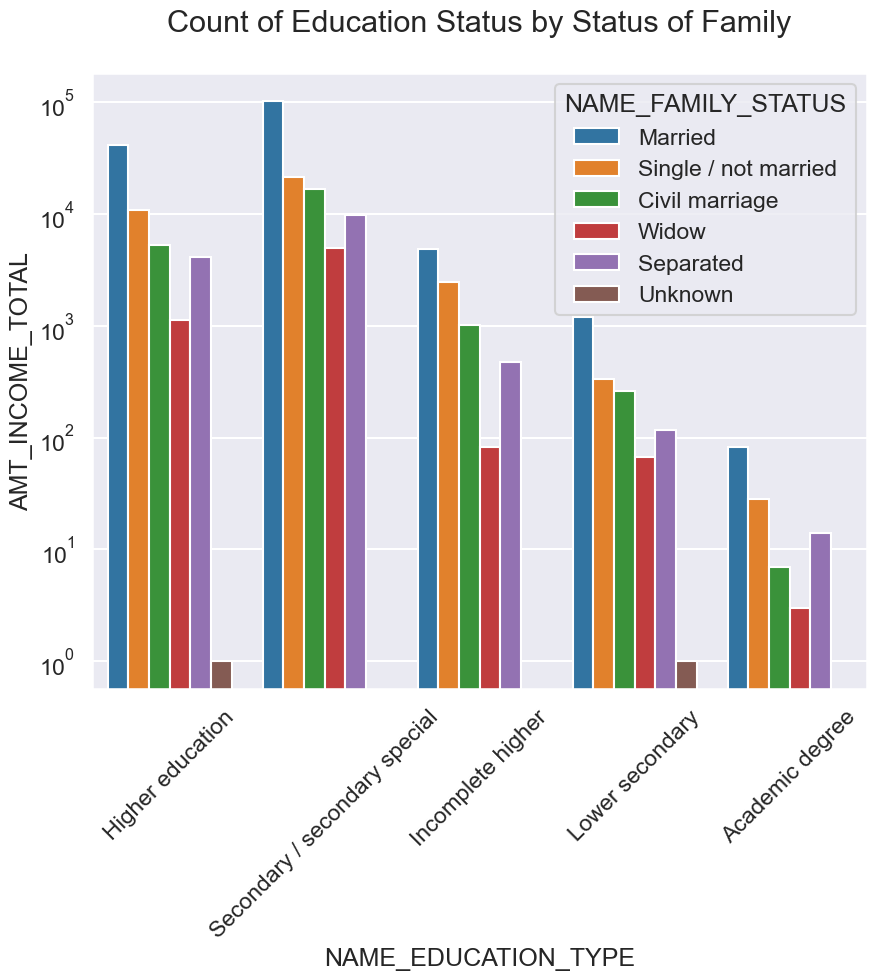

In [62]:
plt.figure(figsize=(10, 8))
plt.xticks(rotation=45)
plt.yscale('log')
sns.countplot(data=data1_df, x='NAME_EDUCATION_TYPE', hue='NAME_FAMILY_STATUS')
plt.title('Count of Education Status by Status of Family')
plt.xlabel('NAME_EDUCATION_TYPE')
plt.ylabel('AMT_INCOME_TOTAL')
plt.show()

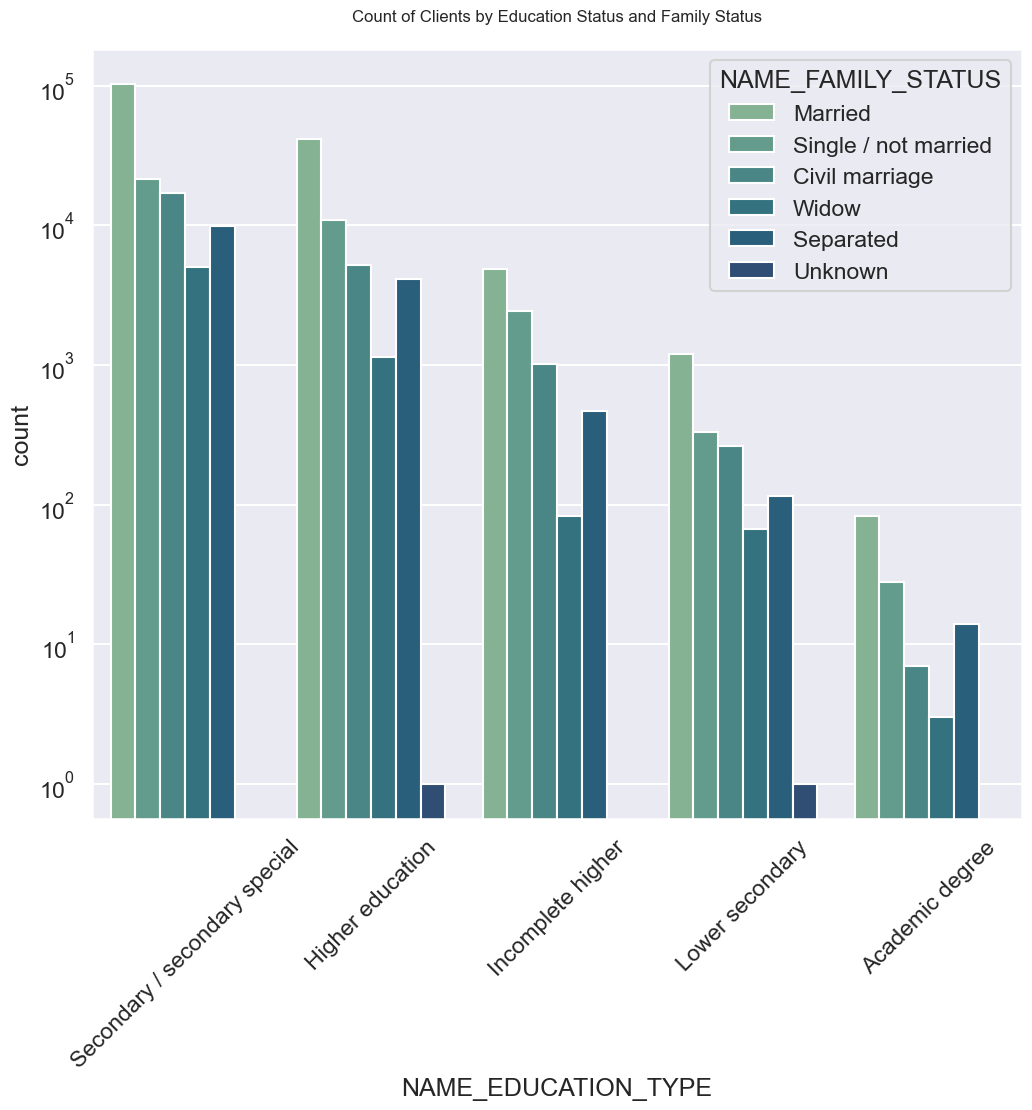

In [63]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=45)
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.titlepad'] = 20
plt.title('Count of Clients by Education Status and Family Status')
ax = sns.countplot(data=data1_df, x='NAME_EDUCATION_TYPE', hue='NAME_FAMILY_STATUS', 
                   order=data1_df['NAME_EDUCATION_TYPE'].value_counts().index, palette='crest')
ax.set_yscale('log')
plt.show()

In [64]:
df1=pd.read_csv("previous_application.csv")
empty_cols1=df1.isnull().sum()
empty_cols1=empty_cols1[empty_cols1.values>(0.3*len(empty_cols1))]
len(empty_cols1)
empty_cols1 = list(empty_cols1[empty_cols1.values>=0.3].index)
df1.drop(labels=empty_cols1,axis=1,inplace=True)
df1.shape

(1670214, 22)

In [65]:
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

df1.shape

(69635, 22)

/var/folders/02/hth6ck2s1zq30qpsrfy6vcc80000gn/T/ipykernel_1968/2390280325.py:1: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')


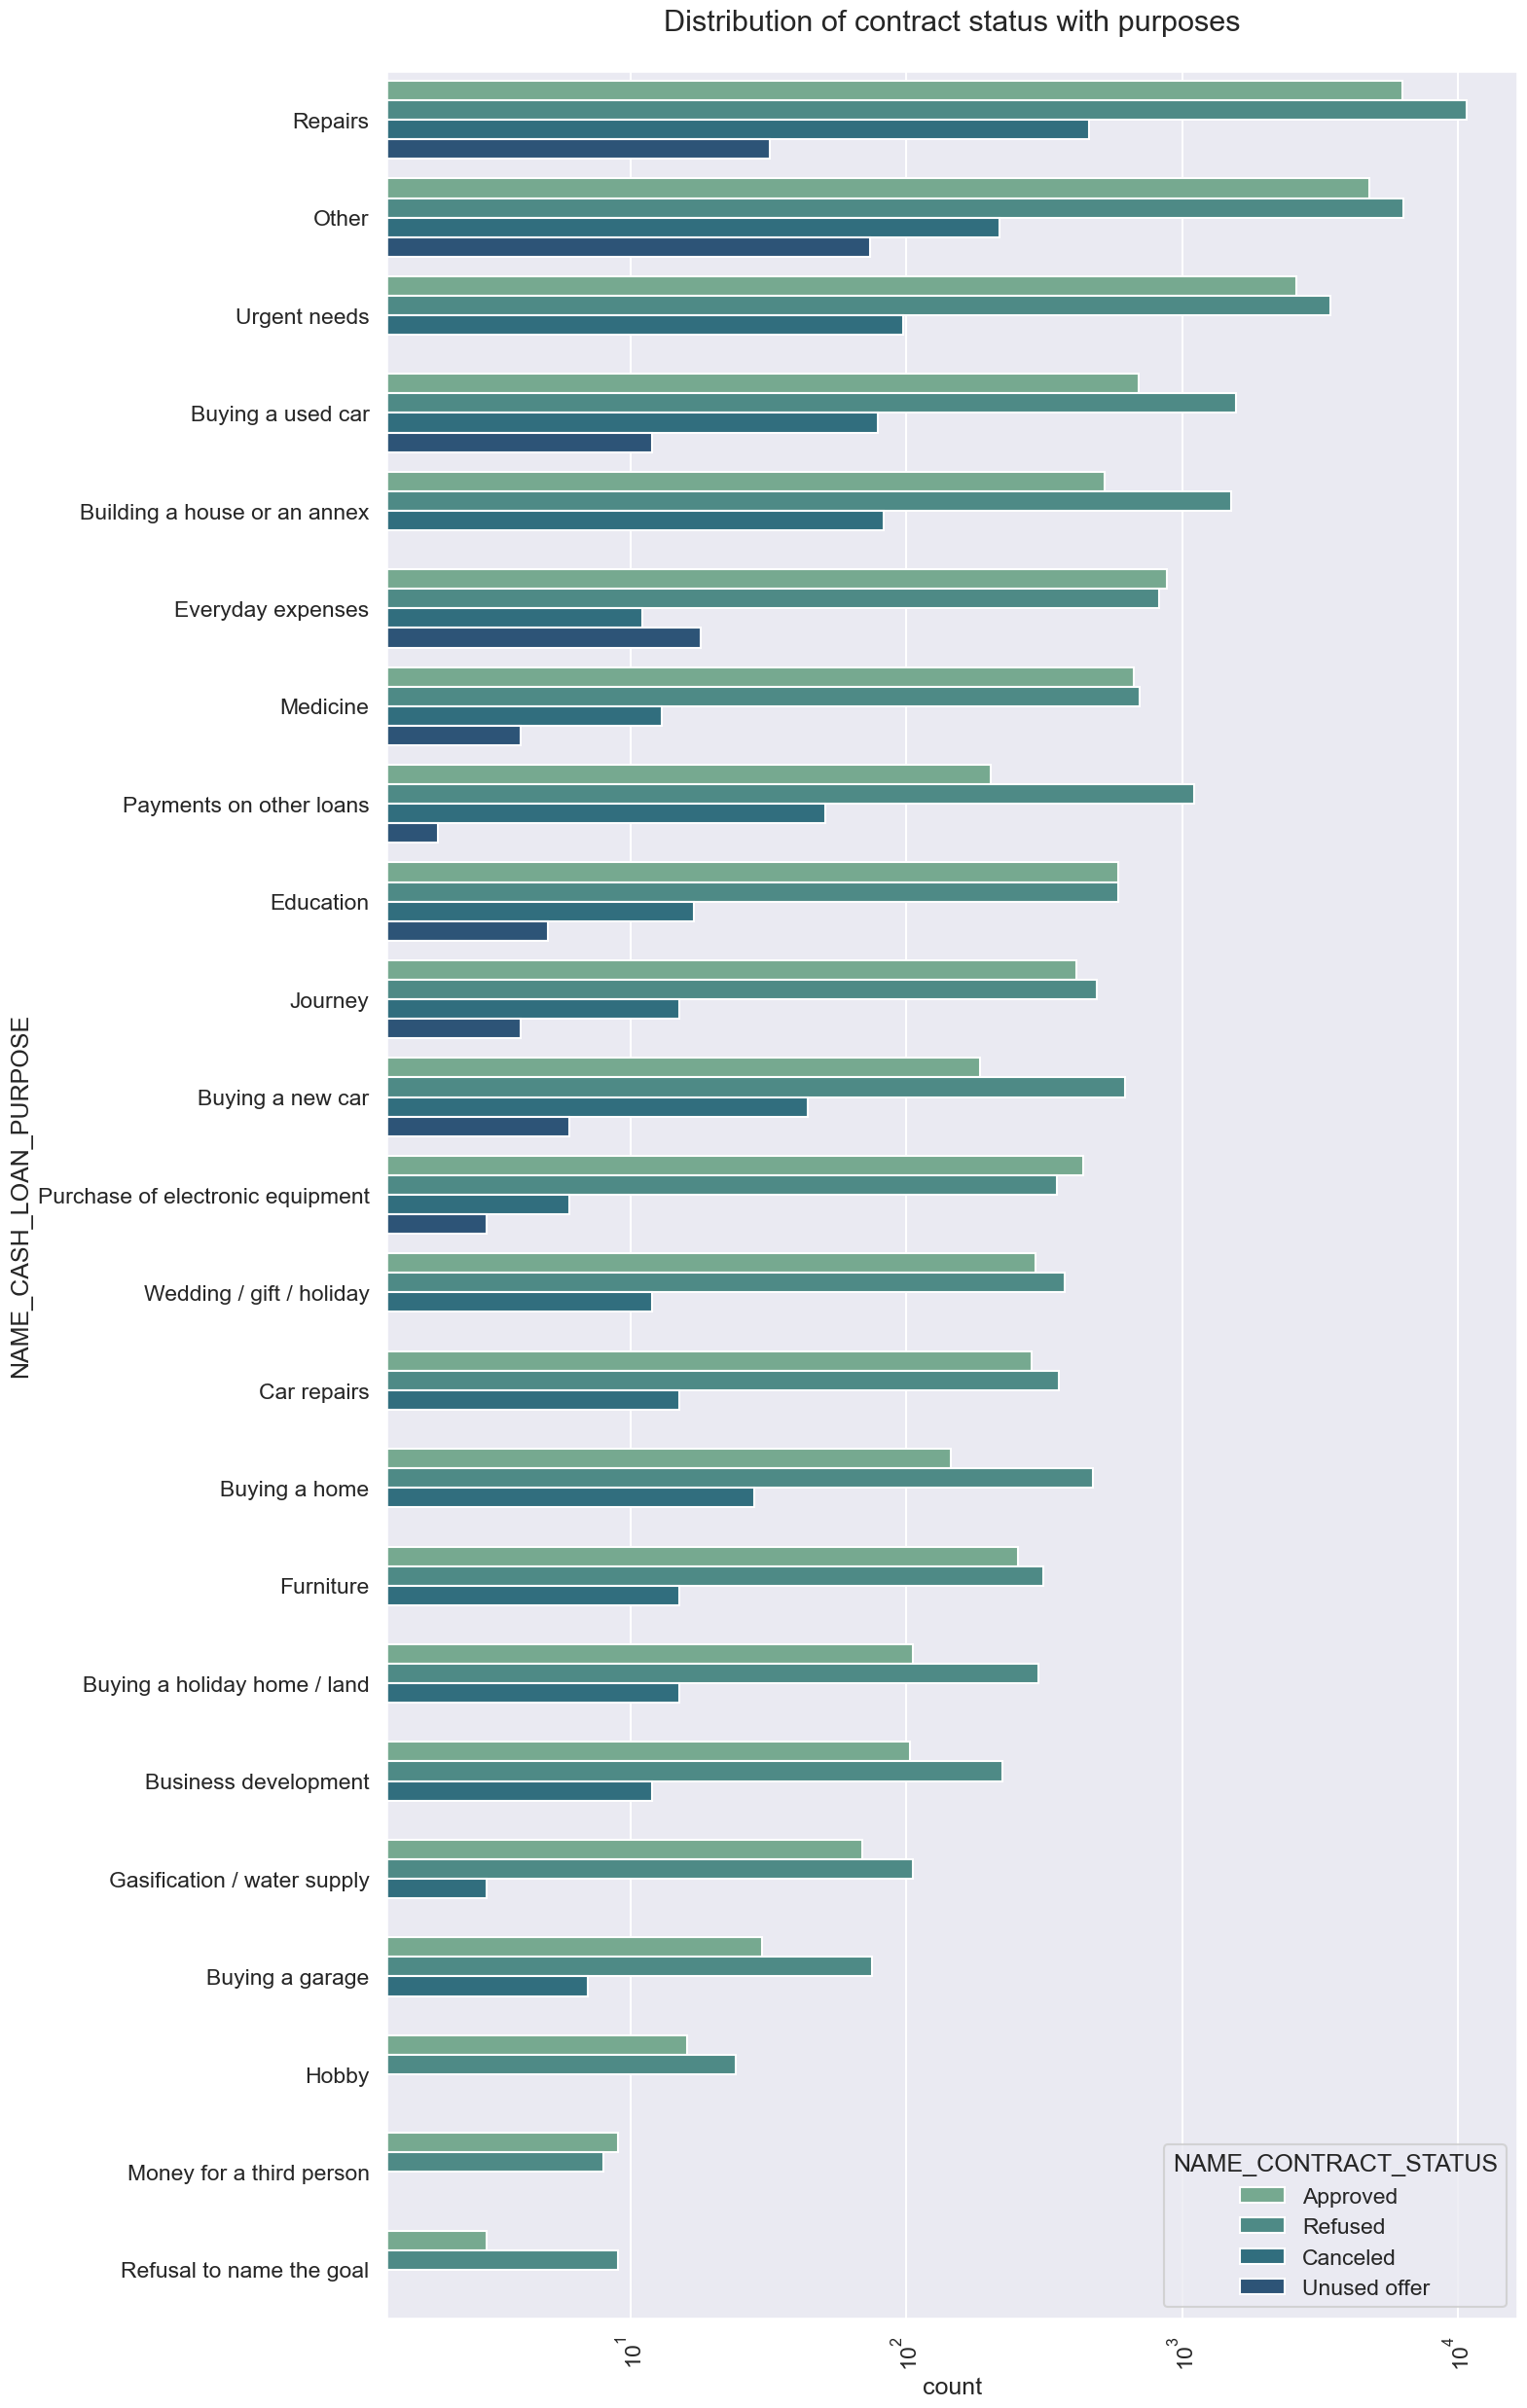

In [66]:
new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')

new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)

new_df1.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=new_df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='crest') 

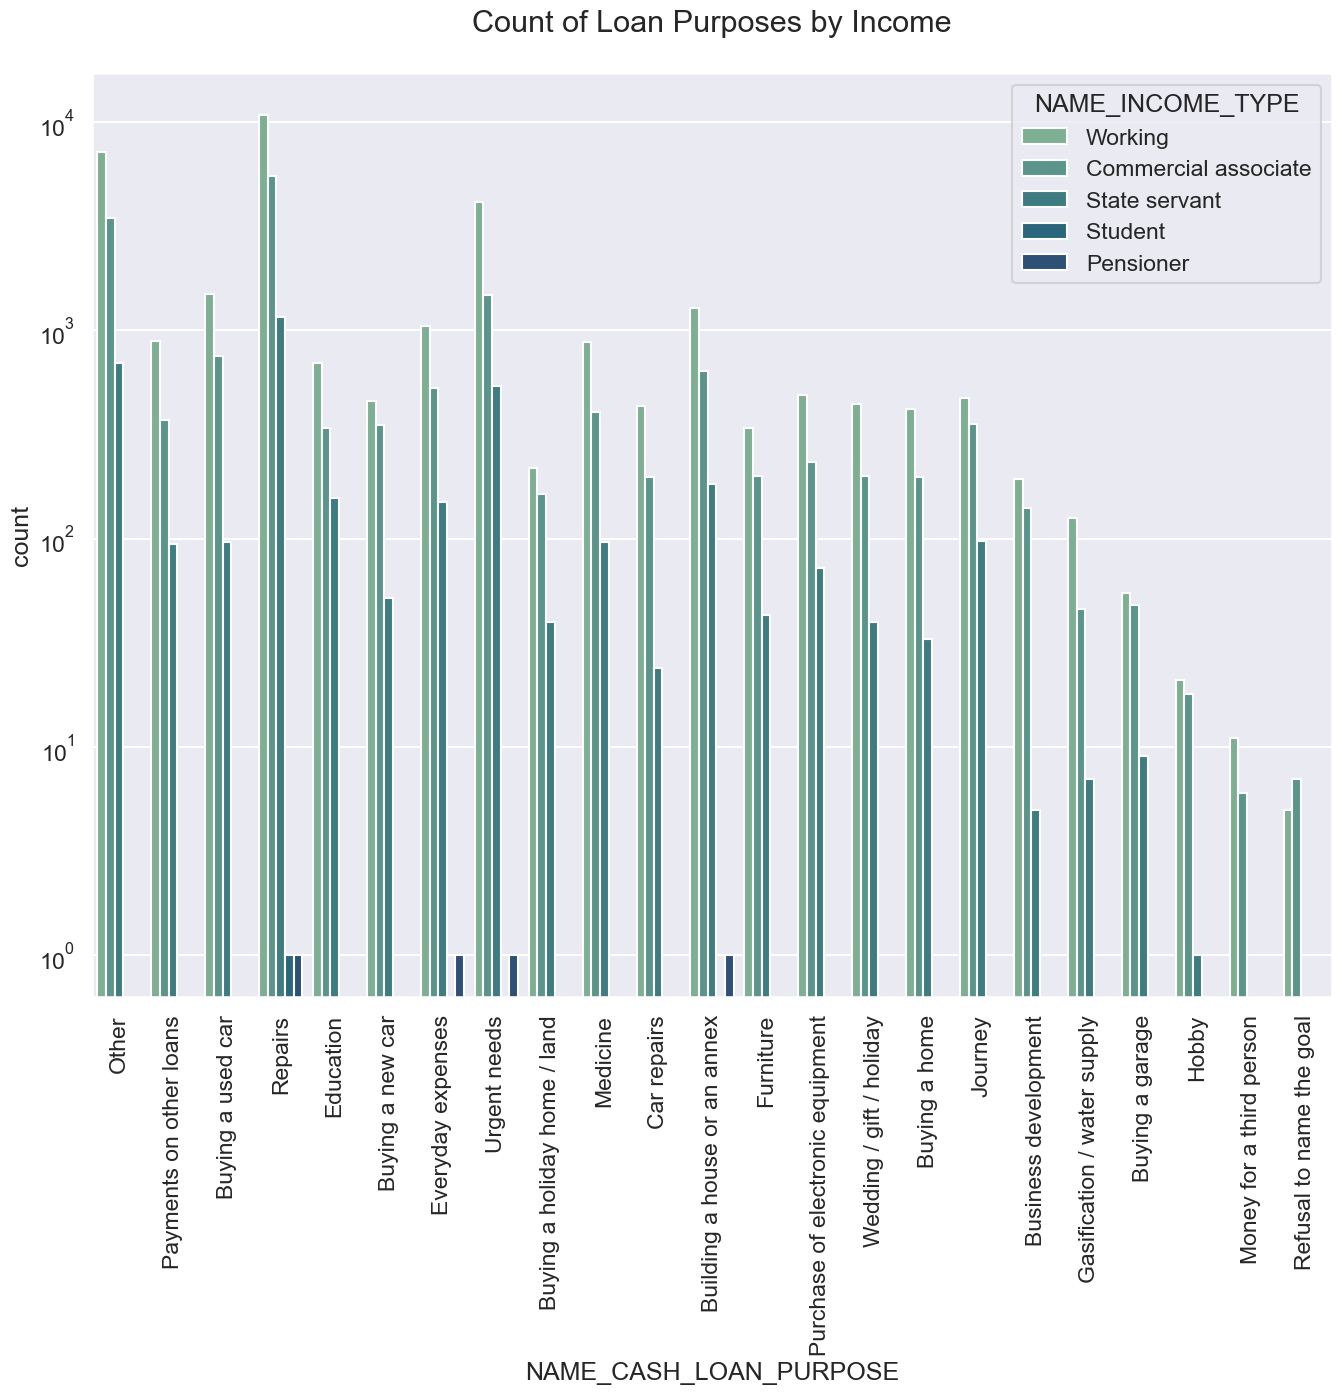

In [67]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
plt.yscale('log')
sns.countplot(data=new_df1, x='NAME_CASH_LOAN_PURPOSE', hue='NAME_INCOME_TYPE', palette='crest')
plt.title('Count of Loan Purposes by Income')
plt.show()

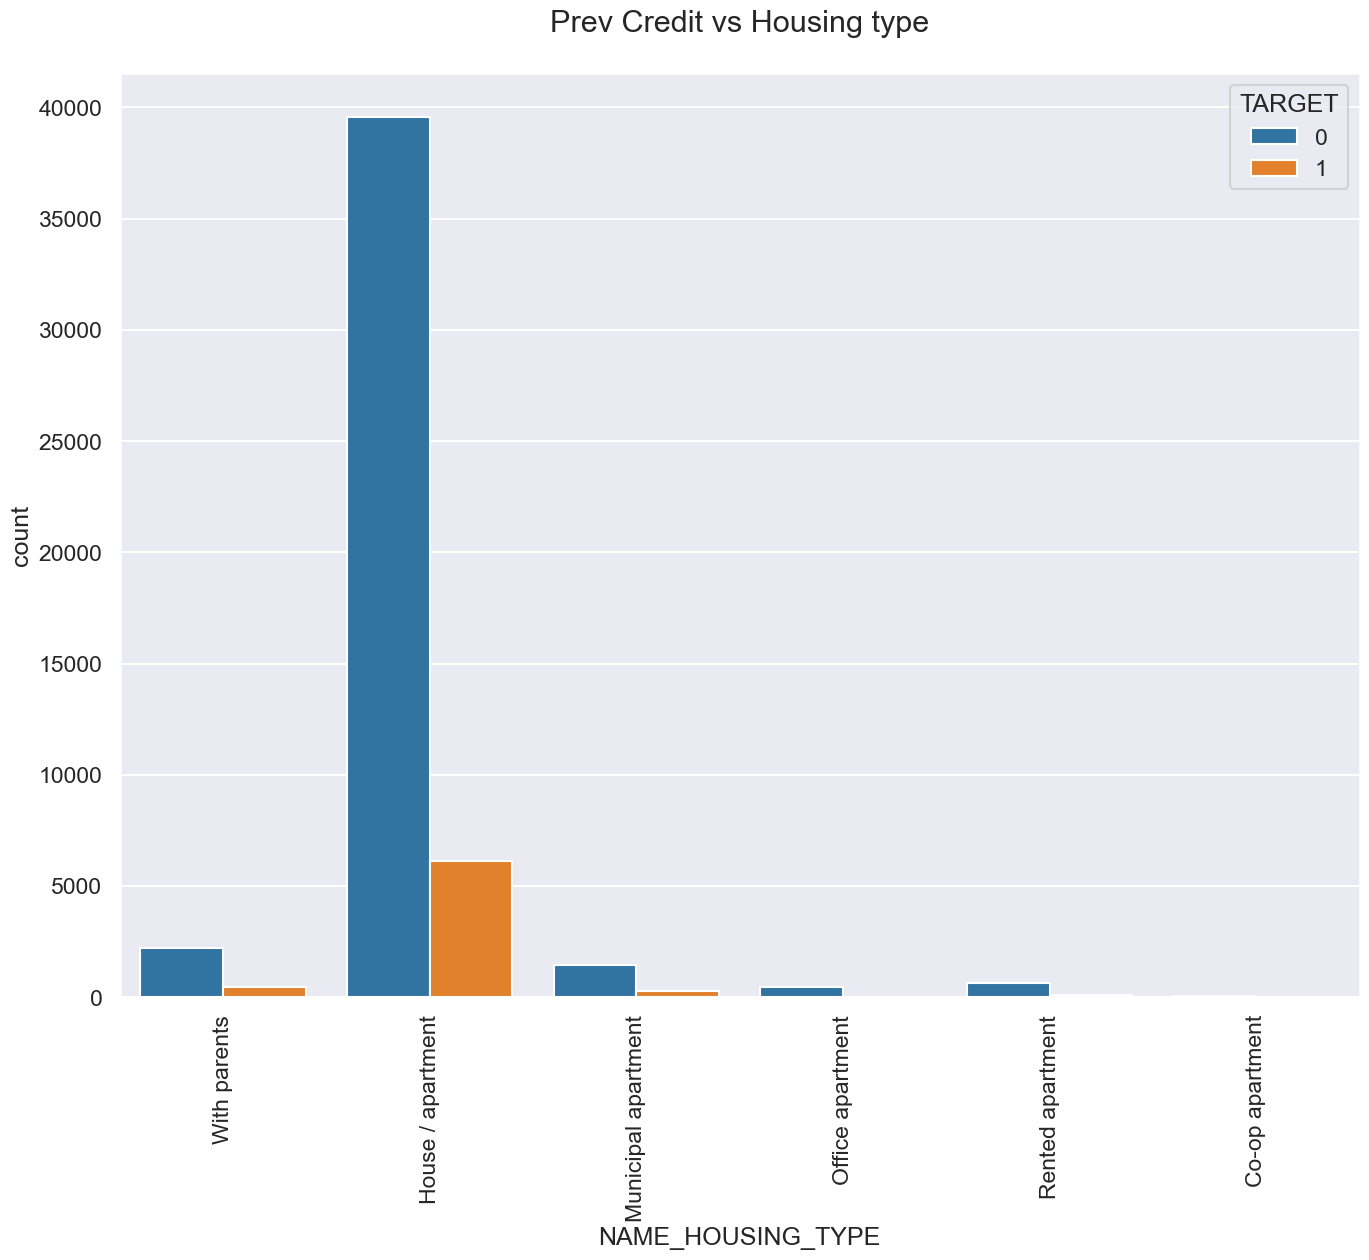

In [68]:
plt.figure(figsize=(16, 12))
plt.xticks(rotation=90)
sns.countplot(data=new_df1, x='NAME_HOUSING_TYPE', hue='TARGET')
plt.title('Prev Credit vs Housing type')
plt.show()

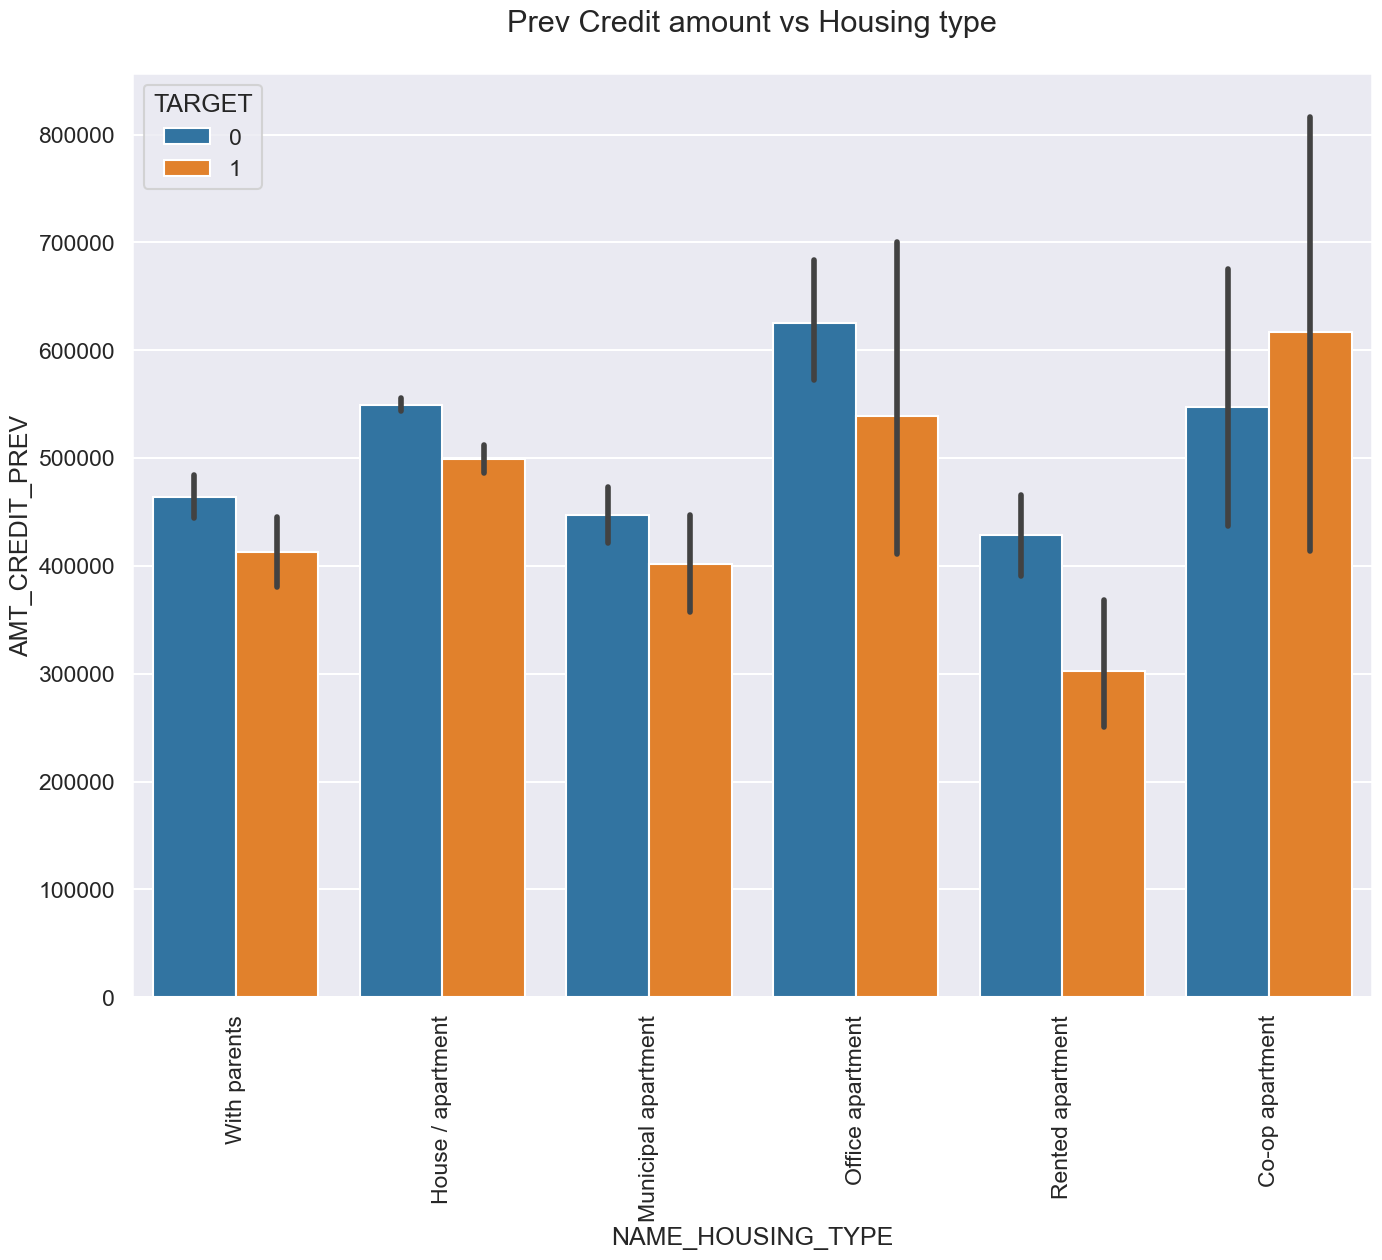

In [69]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

In [70]:
1. The proportion of Payment Difficulties among pensioners has decreased, while the proportion of Payment Difficulties among working individuals has increased, compared to both Payment Difficulties and non-Payment Difficulties.

2. There is a lower percentage of married and widowed individuals with Loan Payment Difficulties and a higher percentage of single and civil married individuals with Loan Payment Difficulties, compared to both Loan Payment Difficulties and Loan Non-Payment Difficulties.

3. The percentage of Loan Payment Difficulties with secondary/secondary special educational qualifications has increased, while the percentage of Loan Payment Difficulties with higher education completion has decreased, compared to both Loan Payment Difficulties and Loan Non-Payment Difficulties.

4. The count of 'Low skilled Laborers' in the 'OCCUPATION_TYPE' category is relatively low, but they have the highest percentage of payment difficulties, around 17%. Therefore, clients with the occupation type 'Low skilled Laborers' are significant contributors to Loan Defaulters.

5. The count of 'Lower Secondary' in the 'NAME_EDUCATION_TYPE' category is relatively low, but they have the highest percentage of payment difficulties, around 11%. Hence, clients with an education type of 'Lower Secondary' are major factors contributing to Loan Defaulters.

6. Banks should pay more attention to clients with contract types such as Student, pensioner, and Businessman who have housing types other than Co-op apartment or Office apartment, as they are more likely to have successful payments.

7. Banks should be cautious with clients whose income type is Working, as they have the highest number of unsuccessful payments.

8. Additionally, clients with loan purposes categorized as Repair tend to have a higher number of unsuccessful payments.

9. It would be beneficial for banks to target clients with housing type With parents, as they have the lowest number of unsuccessful payments.

SyntaxError: invalid syntax (2368512994.py, line 1)